## Analyse Traffic accident data to identify pattern related to road conditions,weather and time of day. Visualize accident hotspots and contributing factors.

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
plt.style.use("seaborn-v0_8")
sns.set_palette("deep")


In [10]:
# Loading of the data
df = pd.read_csv("US_Accidents_March23.csv", low_memory=False)


In [12]:
print("Dataset shape:", df.shape)
print("\nColumn names:\n", df.columns.tolist())


Dataset shape: (93941, 46)

Column names:
 ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [14]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df["hour"] = df["Start_Time"].dt.hour
df["weekday"] = df["Start_Time"].dt.day_name()
df["Weather_Condition"] = df["Weather_Condition"].fillna("Unknown")


## Accidents by Hour of the Day

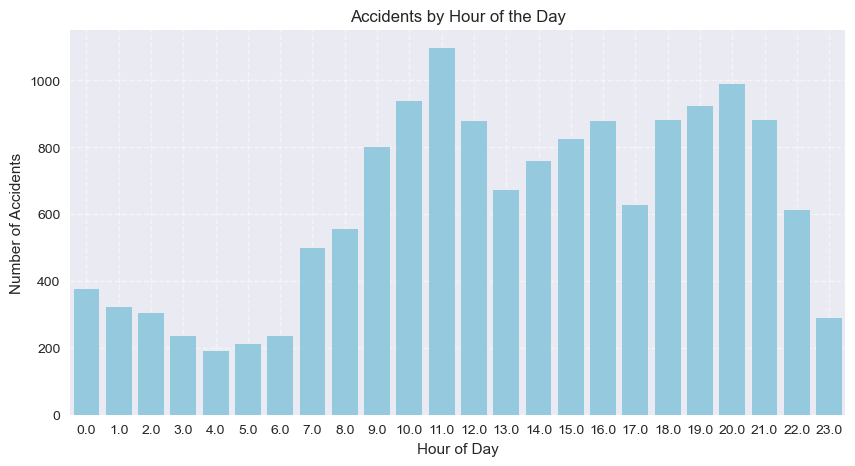

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x="hour", data=df, color="skyblue")
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## Accidents by Weekday

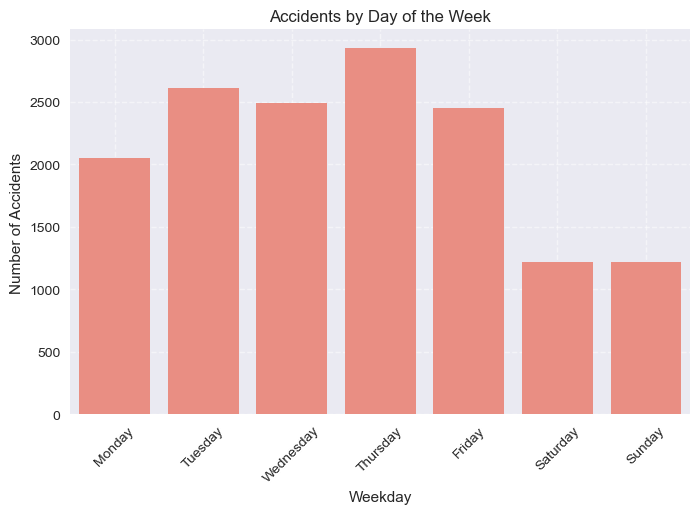

In [20]:
plt.figure(figsize=(8,5))
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.countplot(x="weekday", data=df, order=order, color="salmon")
plt.title("Accidents by Day of the Week")
plt.xlabel("Weekday")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

 ## Top 10 Weather Conditions

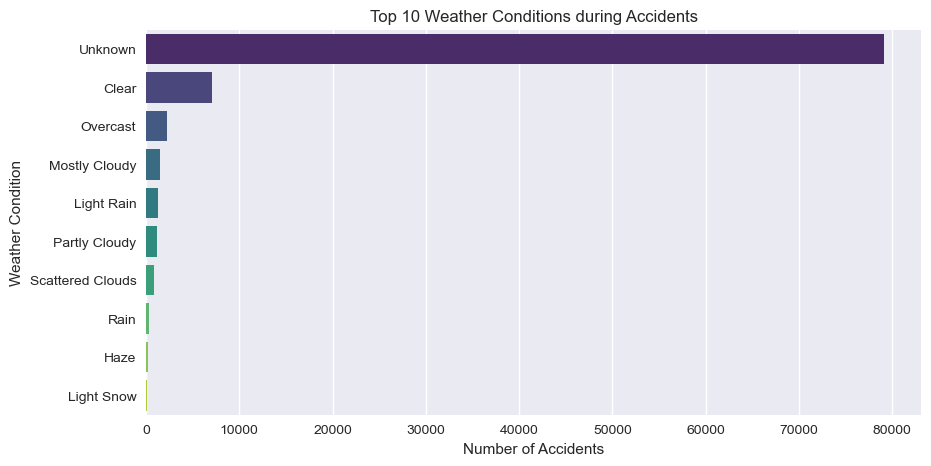

In [25]:
top_weather = df["Weather_Condition"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    x=top_weather.values,
    y=top_weather.index,
    hue=top_weather.index,   # add hue to enable palette safely
    palette="viridis",
    legend=False             # hide redundant legend
)
plt.title("Top 10 Weather Conditions during Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()


## Geographic Hotspots (Hexbin Map)

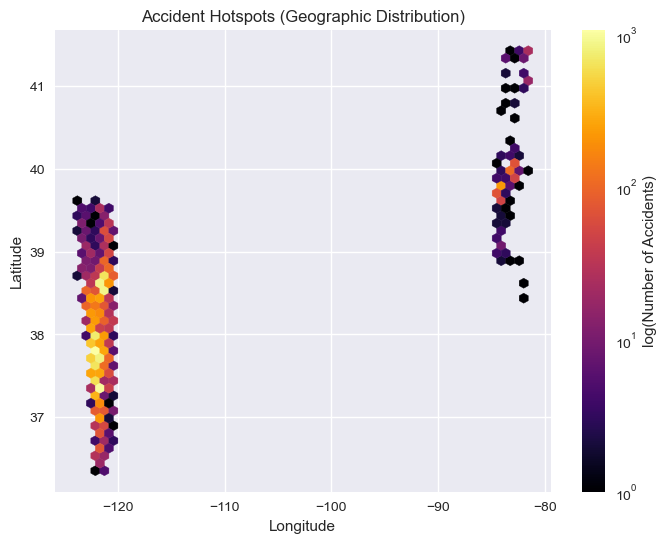

In [28]:
df_geo = df.dropna(subset=["Start_Lat", "Start_Lng"])

plt.figure(figsize=(8,6))
plt.hexbin(df_geo["Start_Lng"], df_geo["Start_Lat"], gridsize=50, cmap="inferno", bins="log")
plt.colorbar(label="log(Number of Accidents)")
plt.title("Accident Hotspots (Geographic Distribution)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Severity Distribution

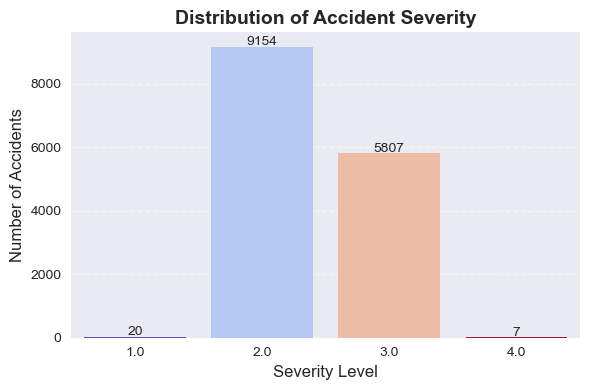

In [32]:
plt.figure(figsize=(6,4))
ax = sns.countplot(
    x="Severity",
    data=df,
    hue="Severity",
    palette="coolwarm",
    legend=False
)

# Add value labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 50,
            int(p.get_height()), ha='center', fontsize=10)

plt.title("Distribution of Accident Severity", fontsize=14, fontweight='bold')
plt.xlabel("Severity Level", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Accident Severity Distribution

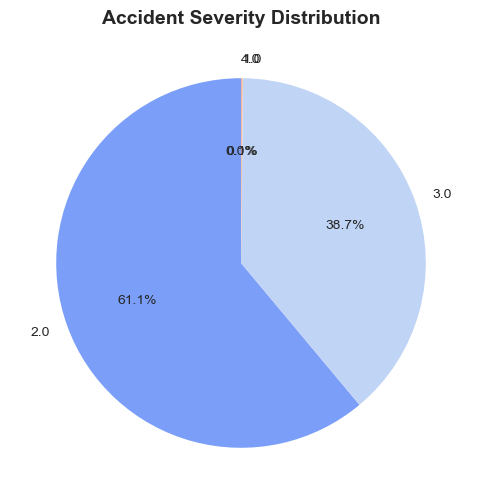

In [39]:
severity_counts = df['Severity'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("coolwarm", len(severity_counts)))
plt.title("Accident Severity Distribution", fontsize=14, fontweight='bold')
plt.show()


## Correlation Heatmap — Environmental Factors

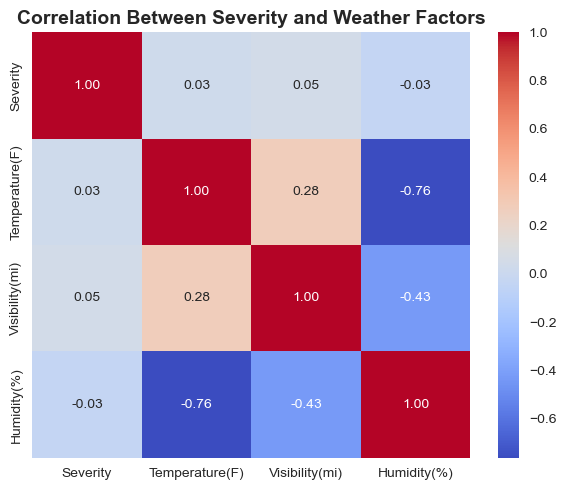

In [42]:
num_cols = ['Severity', 'Temperature(F)', 'Visibility(mi)', 'Humidity(%)']
corr = df[num_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Severity and Weather Factors", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
